## Coupling qubits to the feedline

We consider a feedline with an input capacitance $ C_{\text{in}} $ to investigate how the coupling changes as the distance between the device under test (either a qubit coupled to a single resonator or a qubit coupled to a resonator which is itself coupled to a Purcell filter) and the input capacitance varies. We perform this analysis for both capacitive and inductive coupling. We expect maximum coupling at a distance of $\lambda/2$ for capacitive coupling and $\lambda/4$ for inductive coupling, where $\lambda$ is the wavelength corresponding to the frequency we aim to read out through the feedline.

It should be noted that a feedline terminated on an input capacitance may introduce unwanted modes. Such modes generally exhibit a very high $\kappa$ and are automatically removed by the code. 



In [3]:
import numpy as np
import qultra as qu

In [4]:
Cj=85e-15 #qubit capacitance
Lj=9.2e-9 #qubit junction
Cg=6e-15 #coupling capacitance
l=3.8e-3 #cpw length
Cp=12e-15


net=[qu.C(0,1,Cj),qu.J(0,1,Lj,1),qu.C(1,2,Cg),qu.CPW(0,2,l),qu.C(2,3,Cp),qu.CPW(3,0,l),qu.C(3,4,20e-15),qu.R(0,4,50)]
circuit=qu.QCircuit(net,3,10)
circuit.show_all()
print("Qubit Purcell decay time is:",1/circuit.kappa()[0]/1e6/2/np.pi/1e-3,"ms")

+------+------------+-----------+-----------+
| Mode | Freq [GHz] |  k [MHz]  |     Q     |
+------+------------+-----------+-----------+
|  1   |  5.50e+00  | -4.64e-05 | -1.18e+08 |
|  2   |  7.33e+00  | -1.49e+01 | -4.90e+02 |
|  3   |  7.64e+00  | -5.31e+00 | -1.44e+03 |
+------+------------+-----------+-----------+
Chi matrix [MHz]:
+------+----------+----------+----------+
| Mode |    1     |    2     |    3     |
+------+----------+----------+----------+
|  1   | 2.11e+02 | 4.55e-01 | 1.21e+00 |
|  2   | 4.55e-01 | 2.45e-04 | 1.30e-03 |
|  3   | 1.21e+00 | 1.30e-03 | 1.73e-03 |
+------+----------+----------+----------+
Qubit Purcell decay time is: 3.427857827751835 ms


In [5]:
from qultra import constants
constants.step=0.001
Cin=0.204/(2*50*2*np.pi*7.6e9)
l_l=np.arange(0.1,14,0.2)
k1=[]
for li in l_l:
    net=[qu.C(0,1,Cj),qu.J(0,1,Lj,1),qu.C(1,2,Cg),qu.CPW(0,2,l),qu.C(2,3,Cp),qu.CPW(3,0,l),qu.C(3,4,20e-15),qu.CPW(5,4,li*1e-3),qu.C(6,5,Cin),qu.R(0,4,50),qu.R(6,0,50)]
    circuit=qu.QCircuit(net,3,12)
    k1.append(circuit.kappa()[2])



C:\Users\simyz\OneDrive - Alma Mater Studiorum Università di Bologna\Desktop\GitHub\QuLTRA\src\qultra\find_zeros.py:65: UserWarning: Newton's method failed for initial guess 11947674207.507673j: Failed to converge after 150 iterations, value is (-2765418734.14917+8629017391.706299j).
  warnings.warn(f"Newton's method failed for initial guess {x0}: {e_newton}")
C:\Users\simyz\OneDrive - Alma Mater Studiorum Università di Bologna\Desktop\GitHub\QuLTRA\src\qultra\find_zeros.py:76: UserWarning: Zero point (-2765418734.1491723+8629017391.706297j) has k > k_max, excluding it.
  warnings.warn(f"Zero point {zero_point} has k > k_max, excluding it.")
C:\Users\simyz\OneDrive - Alma Mater Studiorum Università di Bologna\Desktop\GitHub\QuLTRA\src\qultra\find_zeros.py:76: UserWarning: Zero point (-2730992242.4150095+8494629400.988188j) has k > k_max, excluding it.
  warnings.warn(f"Zero point {zero_point} has k > k_max, excluding it.")
C:\Users\simyz\OneDrive - Alma Mater Studiorum Università di Bo

In [6]:
Cj2=97e-15
Lj2=16.3e-9
Cg2=8e-15
l2=5.85e-3
lc=0.7e-3

net2=[qu.C(0,1,Cj2),qu.J(0,1,Lj2),qu.C(1,2,Cg2),qu.CPW(2,3,l2-lc),qu.CPW_coupler([3,0,4,5],[10,10,10,10],[15,5,15],lc),qu.CPW(6,4,l2-lc),qu.R(0,5,50),qu.C(7,6,Cin),qu.R(0,7,50)]
circuit2=qu.QCircuit(net2,3,10)
circuit2.show_all()

+------+------------+-----------+-----------+
| Mode | Freq [GHz] |  k [MHz]  |     Q     |
+------+------------+-----------+-----------+
|  1   |  3.84e+00  | -4.93e-03 | -7.80e+05 |
|  2   |  4.98e+00  | -2.76e+00 | -1.81e+03 |
+------+------------+-----------+-----------+
Chi matrix [MHz]:
+------+----------+----------+
| Mode |    1     |    2     |
+------+----------+----------+
|  1   | 1.82e+02 | 2.10e+00 |
|  2   | 2.10e+00 | 6.04e-03 |
+------+----------+----------+


In [7]:

k2=[]
for li in l_l:
    net2=[qu.C(0,1,Cj2),qu.J(0,1,Lj2),qu.C(1,2,Cg2),qu.CPW(2,3,l2-lc),qu.CPW_coupler([3,0,4,5],[10,10,10,10],[15,5,15],lc),qu.CPW(6,4,li*1e-3),qu.R(0,5,50),qu.C(7,6,Cin),qu.R(0,7,50)]
    circuit2=qu.QCircuit(net2,2,10)
    k2.append(circuit2.kappa()[1])

C:\Users\simyz\OneDrive - Alma Mater Studiorum Università di Bologna\Desktop\GitHub\QuLTRA\src\qultra\find_zeros.py:76: UserWarning: Zero point (-4649134255.719523+9208964384.734392j) has k > k_max, excluding it.
  warnings.warn(f"Zero point {zero_point} has k > k_max, excluding it.")
C:\Users\simyz\OneDrive - Alma Mater Studiorum Università di Bologna\Desktop\GitHub\QuLTRA\src\qultra\find_zeros.py:76: UserWarning: Zero point (-4562801462.14497+8999810928.990198j) has k > k_max, excluding it.
  warnings.warn(f"Zero point {zero_point} has k > k_max, excluding it.")
C:\Users\simyz\OneDrive - Alma Mater Studiorum Università di Bologna\Desktop\GitHub\QuLTRA\src\qultra\find_zeros.py:76: UserWarning: Zero point (-4480072583.546942+8800017992.851988j) has k > k_max, excluding it.
  warnings.warn(f"Zero point {zero_point} has k > k_max, excluding it.")
C:\Users\simyz\OneDrive - Alma Mater Studiorum Università di Bologna\Desktop\GitHub\QuLTRA\src\qultra\find_zeros.py:76: UserWarning: Zero point

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6')])

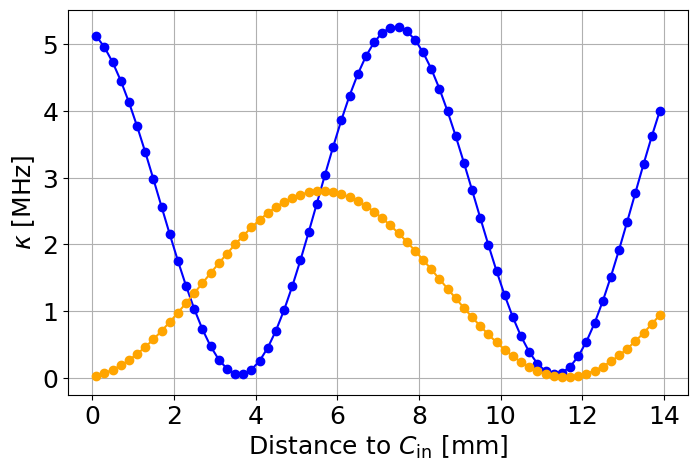

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(l_l, k1, 'o-', color='blue',label='Structure 1')
plt.plot(l_l, k2, 'o-', color='orange',label='Structure 2')
plt.xlabel('Distance to $C_\mathrm{in}$ [mm]', fontsize=18)
plt.ylabel('$\kappa$ [MHz]',fontsize=18)
plt.grid(True)

#plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

Here, we place the two structures at the positions where $\kappa$ is maximized and analyze the entire circuit in one shot.

In [14]:
complex_net=[qu.C(0,1,Cj), #first qubit
             qu.J(0,1,Lj),
             qu.C(1,2,Cg), #coupling capacitor
             qu.CPW(0,2,l), #resonator
             qu.C(2,3,Cp),
             qu.CPW(3,0,l), #purcell filter
             qu.C(3,4,20e-15), #coupling capacitance
             qu.C(0,5,Cj2), #second qubit
             qu.J(0,5,Lj2),
             qu.C(5,6,Cg2),
             qu.CPW(6,7,l2-0.7e-3),
             qu.CPW_coupler([7,0,8,9],[10,10,10,10],[15,5,15],0.7e-3), #coupler
             qu.R(0,9,50),
             qu.CPW(8,4,l2-0.7e-3),
             qu.C(4,10,Cin),
             qu.R(10,0,50)]

complex=qu.QCircuit(complex_net,3,10)
complex.show_all()

+------+------------+-----------+-----------+
| Mode | Freq [GHz] |  k [MHz]  |     Q     |
+------+------------+-----------+-----------+
|  1   |  3.84e+00  | -5.04e-03 | -7.62e+05 |
|  2   |  4.98e+00  | -2.78e+00 | -1.80e+03 |
|  3   |  5.50e+00  | -4.55e-05 | -1.21e+08 |
|  4   |  7.33e+00  | -1.42e+01 | -5.16e+02 |
|  5   |  7.64e+00  | -5.06e+00 | -1.51e+03 |
+------+------------+-----------+-----------+
Chi matrix [MHz]:
+------+----------+----------+----------+----------+----------+
| Mode |    1     |    2     |    3     |    4     |    5     |
+------+----------+----------+----------+----------+----------+
|  1   | 1.82e+02 | 2.10e+00 | 1.76e-10 | 2.05e-06 | 5.86e-07 |
|  2   | 2.10e+00 | 6.04e-03 | 9.58e-09 | 1.18e-08 | 3.40e-09 |
|  3   | 1.76e-10 | 9.58e-09 | 2.11e+02 | 4.55e-01 | 1.20e+00 |
|  4   | 2.05e-06 | 1.18e-08 | 4.55e-01 | 2.45e-04 | 1.30e-03 |
|  5   | 5.86e-07 | 3.40e-09 | 1.20e+00 | 1.30e-03 | 1.72e-03 |
+------+----------+----------+----------+----------+----